In [1]:
from lsst.ts import salobj
import asyncio
import numpy as np

import SALPY_ATMCS

In [2]:
r = salobj.Remote(SALPY_ATMCS)

In [3]:
await salobj.set_summary_state(r, salobj.State.ENABLED)

AckError: msg='Command failed with ack code -301', cmd_id=1559663153, ack=(ack=-301, error=0, result='Ok')

In [ ]:
mv = r.tel_measuredMotorVelocity.get()

In [ ]:
mv.azimuthMotor1Velocity, mv.azimuthMotor2Velocity

In [ ]:
mt = r.tel_measuredTorque.get()
print(mt)

In [ ]:
mt.azimuthMotor1Torque, mt.azimuthMotor2Torque

In [ ]:
me = r.tel_mountEncoders.get()

In [ ]:
me.azimuthCalculatedAngle, me.azimuthEncoder1Raw, me.azimuthEncoder2Raw, me.azimuthEncoder3Raw

In [ ]:
td = r.tel_torqueDemand.get()

In [ ]:
td.azimuthMotor1Torque, td.azimuthMotor2Torque

In [4]:
class StoreMountData:
    def __init__(self):
        self.mmv = np.array([], dtype=[("m1", np.float), ("m2", np.float)])
        self.mt = np.array([], dtype=[("m1", np.float), ("m2", np.float)])
        self.me = np.array([])
        self.td = np.array([], dtype=[("m1", np.float), ("m2", np.float)])
        
    def mmv_callback(self, id_data):
        self.mmv = np.append(self.mmv, 
                             np.array((id_data.azimuthMotor1Velocity, id_data.azimuthMotor2Velocity),
                                      dtype=self.mmv.dtype)
                            )
    
    def mt_callback(self, id_data):
        self.mt = np.append(self.mt, 
                            np.array((id_data.azimuthMotor1Torque, id_data.azimuthMotor2Torque), 
                                     dtype=self.mt.dtype)
                           )
    
    def me_callback(self, id_data):
        self.me = np.append(self.me, id_data.azimuthCalculatedAngle)
    
    def td_callback(self, id_data):
        self.td = np.append(self.td, 
                            np.array((id_data.azimuthMotor1Torque, id_data.azimuthMotor2Torque), 
                                     dtype=self.td.dtype))
        

In [5]:
smd = StoreMountData()

In [6]:
r.tel_measuredMotorVelocity.callback = smd.mmv_callback
r.tel_measuredTorque.callback = smd.mt_callback
r.tel_mountEncoders.callback = smd.me_callback
r.tel_torqueDemand.callback = smd.td_callback

In [8]:
ss = await r.evt_summaryState.next(flush=True)

In [ ]:
await asyncio.sleep(30.)

In [15]:
r.tel_measuredMotorVelocity.callback = None
r.tel_measuredTorque.callback = None
r.tel_mountEncoders.callback = None
r.tel_torqueDemand.callback = None

In [9]:
smd.td

array([(-0.00424113, -0.00424113), ( 0.00104217,  0.00104217),
       (-0.00487   , -0.00487   ), ..., ( 0.00436219,  0.00436219),
       ( 0.00243608,  0.00243608), ( 0.00160289,  0.00160289)],
      dtype=[('m1', '<f8'), ('m2', '<f8')])

In [ ]:
mt = await r.tel_measuredTorque.next(flush=True, timeout=20)

In [ ]:
a = np.array([], dtype=[("m1", np.float), ("m2", np.float)]) 

In [ ]:
a

In [ ]:
np.append(a, np.array((0.,0.), dtype=a.dtype))

In [ ]:
a.dtype

In [10]:
from matplotlib import pyplot as plt

In [11]:
%matplotlib inline

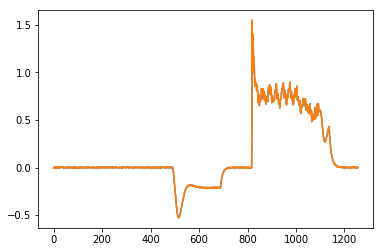

In [13]:
plt.plot(smd.td['m1'])
plt.plot(smd.td['m2'])

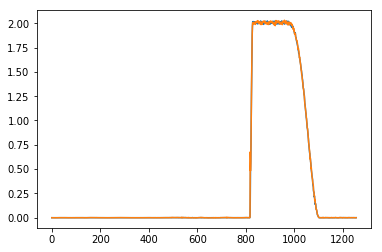

In [14]:
plt.plot(smd.mmv['m1'])
plt.plot(smd.mmv['m2'])

In [19]:
smd2 = StoreMountData()

In [20]:
r.tel_measuredMotorVelocity.callback = smd2.mmv_callback
r.tel_measuredTorque.callback = smd2.mt_callback
r.tel_mountEncoders.callback = smd2.me_callback
r.tel_torqueDemand.callback = smd2.td_callback

In [21]:
ss = await r.evt_summaryState.next(flush=True)